# Memory Leak Detection 

In [18]:
import sys
sys.path.append('../')
from mem_leak_detection import MemLeakDetectionAlgorithm
from mem_leak_detection import MemLeakDetectionAlgorithmPolyFit
from mem_leak_detection import MemLeakDetectionAlgorithmChangePoints
from mem_leak_detection import Precog
import pandas as pd
# required only for ploting
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams#

rcParams['figure.figsize']= 15,6
rcParams["legend.loc"] = 'upper left' 
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 16
rcParams["font.size"] = 16

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
dataset = pd.read_csv('test2.csv', usecols=[1], engine='python', skipfooter=3, skiprows= 1, header=None)
times = pd.date_range('2019-10-02', periods=len(dataset.values), freq='7min')
dataset.index =  times
dataset.columns = ['mem_util_percent']
dataset["mem_util_percent"] = dataset["mem_util_percent"]
p1 = Precog()
p1 = p1.fit(dataset.mem_util_percent[:648])

DEBUG:mem_leak_detection.precog_change:Using maximum values as filter is Enabled
INFO:mem_leak_detection.precog_change:Training with data for 3 days 03:25:00 (906 points)
DEBUG:mem_leak_detection.precog_change:Seasonality detection is turned off
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend if it exist from change point
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (98 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.785, slope: -0.003)
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (272 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.664, slope: 0.004)
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (344 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.823, slope: 0.004)
DEBUG:mem_leak_detection.precog_change:Found local best trend with error score (r2: 0.823

DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (474 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.439, slope: -0.008)
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (474 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.439, slope: -0.008)
DEBUG:mem_leak_detection.precog_change:Found critical trend with duration 0 days 22:30:00 and slope 0.008 in training data.
INFO:mem_leak_detection.precog_change:Added New Trend
INFO:mem_leak_detection.precog_change:New acceptable duration and slope for trend are 2 days 10:30:00 and 0.010
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend if it exist from change point
DEBUG:mem_leak_detection.precog_change:Searching for the local best trend in series of (91 points) 
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.823, slope: 0.007)
DEBUG:mem_leak_detection.precog_change:Found

In [4]:
points = p1.predict(dataset.mem_util_percent[648:])

INFO:mem_leak_detection.precog_change:Predicting anomalies with data for 1 days 16:35:00 (55 points)
INFO:mem_leak_detection.precog_change:No linear window found
INFO:mem_leak_detection.precog_change:Predicting anomalies with data for 1 days 16:35:00 (143 points)
DEBUG:mem_leak_detection.precog_change:Checking linear fit: (r2: 0.991, slope: 0.007)
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_detection.precog_change:Found trend, but not greater than the training trend so ignoring it
INFO:mem_leak_

In [5]:
points

[]

In [6]:
timestamps = [pd.to_datetime(x.timestamp, unit="ms") for x in points[0].points]

IndexError: list index out of range

In [7]:
anomalies = [x.value for x in points[0].points]

IndexError: list index out of range

In [8]:
df = pd.DataFrame({'timestamp': timestamps, 'values': anomalies})
df.set_index("timestamp", inplace=True)

NameError: name 'timestamps' is not defined

In [9]:
len(p1.fit_trends)

6

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) nor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hanunoo' (NotoSansHanunoo-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragin

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal heavy condensed>) = 10.629999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'G

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Coptic' (NotoSansCoptic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar.ttc) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal regular normal>) = 11.0

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal black normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagr

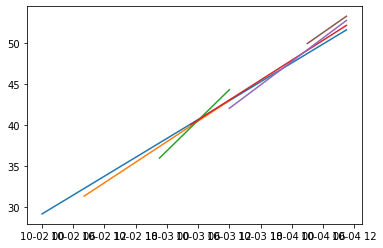

In [10]:
for series in p1.fit_trends:
    plt.plot(series)

In [11]:
df.head()

NameError: name 'df' is not defined

In [12]:
timestamps = pd.to_datetime(points[0].points[0].timestamp, unit="ms")

IndexError: list index out of range

In [13]:
pd.to_datetime(points[0].points[0].timestamp, unit="ms")

IndexError: list index out of range

In [14]:
df

NameError: name 'df' is not defined

In [ ]:
df.index[0]

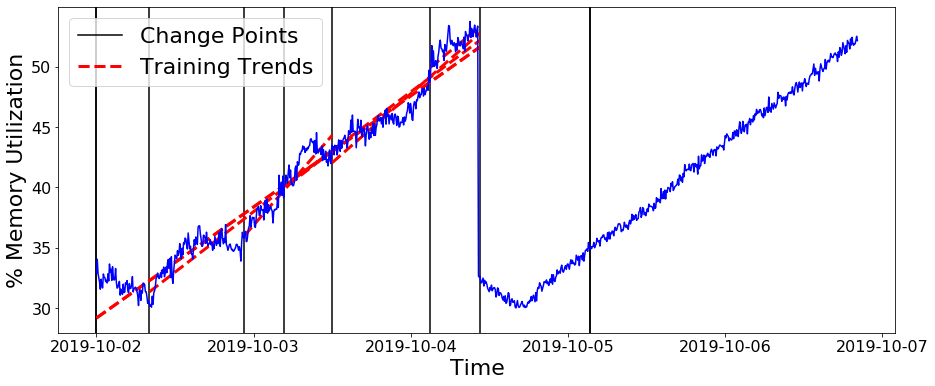

In [20]:
for xc in p1.change_point_indexes[:1]:
    plt.axvline(x=xc, color='black', label='Change Points')
for xc in p1.change_point_indexes:
    plt.axvline(x=xc, color='black')
    
#plt.axvline(x=dataset.index[600], color='green', label='New Data Start Point')
#plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )

#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()
for series in p1.fit_trends[:1]:
    plt.plot(series,'--', linewidth=3, color='red', label='Training Trends')
for series in p1.fit_trends:
    plt.plot(series,'--', linewidth=3, color='red')
plt.plot(dataset.index, dataset.mem_util_percent.values, color='blue' )
#plt.axvspan(df.index[0], df.index[-1], alpha=0.1, color='red', label='Anomalous Window')
plt.xlabel('Time', fontsize=22)
plt.ylabel('% Memory Utilization', fontsize=22)
plt.legend(prop={'size': 22})
plt.savefig('precog_perf_mf_not_case.png', format='png', dpi=300, bbox_inches='tight')

In [526]:
dataset_temp

,0,trend,label
2019-10-02 17:35:00,53.366065,28.631736,1
2019-10-02 17:40:00,32.684917,28.678270,1
2019-10-02 17:45:00,32.559589,28.724803,1
2019-10-02 17:50:00,32.660726,28.771337,1
2019-10-02 17:55:00,32.105358,28.817871,1
...,...,...,...
2019-10-04 10:55:00,52.521662,51.712430,1
2019-10-04 11:00:00,52.159707,51.758964,1
2019-10-04 11:05:00,51.949870,51.805498,1
2019-10-04 11:10:00,52.130587,51.852031,1


In [345]:
dataset = pd.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3, skiprows= 1, header=None)

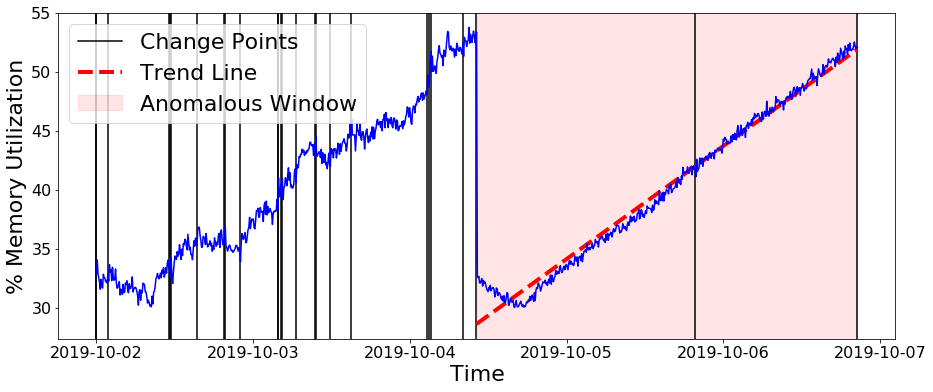

In [504]:
dataset = pd.read_csv('test2.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2019-10-02', periods=len(dataset.values), freq='7min')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['Value']
p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset)
dataset_temp = p1.predict(dataset)
dataset_temp.index = dataset.index[dataset_temp.index[0]:]
#dataset['label'] = dataset_temp['label'].values
#dataset['trend'] = dataset_temp['trend'].values
#dataset['label'].value_counts()
for xc in p1.change_point_indexes[:1]:
    plt.axvline(x=xc, color='black', label='Change Points')
for xc in p1.change_point_indexes:
    plt.axvline(x=xc, color='black')
plt.plot(dataset_temp.query('label == 1').index, dataset_temp.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Trend Line' )
plt.plot(dataset.index, dataset.Value.values, color='blue' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.axvspan(dataset_temp.index[0], dataset_temp.index[-1], alpha=0.1, color='red', label='Anomalous Window')
plt.xlabel('Time', fontsize=22)
plt.ylabel('% Memory Utilization', fontsize=22)
plt.legend(prop={'size': 22})
plt.savefig('lbr_cpd_not_case.png', format='png', dpi=300, bbox_inches='tight')

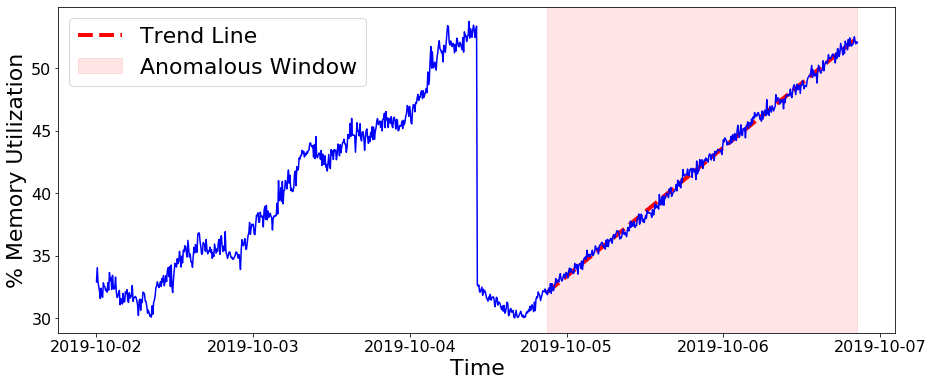

In [505]:
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
dataset = pd.read_csv('test2.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2019-10-02', periods=len(dataset.values), freq='7min')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['Value']
p1 = MemLeakDetectionAlgorithm(min_window = 12)
p1 = p1.fit(dataset)
dataset_n = p1.predict(dataset)
dataset_n['label'].value_counts()
dataset_n.index = dataset.index[dataset_n.index[0]:]

plt.plot(dataset_n.query('label == 1').index, dataset_n.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Trend Line' )
plt.plot(dataset.index, dataset.Value.values, color='blue' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.axvspan(dataset_n.index[0], dataset_n.index[-1], alpha=0.1, color='red', label='Anomalous Window')
plt.xlabel('Time', fontsize=22)
plt.ylabel('% Memory Utilization', fontsize=22)
plt.legend(prop={'size': 22})
plt.savefig('lbr_perf_not_case.png', format='png', dpi=300, bbox_inches='tight')

In [113]:
dataset

,0,label,trend
212,43.791332,1,44.423612
213,40.867882,1,44.680781
214,44.473202,1,44.937950
215,44.628257,1,45.195119
216,43.320352,1,45.452287
...,...,...,...
295,68.867897,1,65.768620
296,63.582232,1,66.025789
297,63.590288,1,66.282957
298,64.849524,1,66.540126


In [1]:
import sys
sys.path.append('../')
from mem_leak_detection import MemLeakDetectionAlgorithm
from mem_leak_detection import MemLeakDetectionAlgorithmPolyFit
from mem_leak_detection import MemLeakDetectionAlgorithmChangePoints
import pandas as pd
# required only for ploting
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize']= 15,6


## Example 1  : Trend Analysis

In [19]:
dataset = pd.read_csv('m_1935.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

p1 = MemLeakDetectionAlgorithm(min_window = 48)
p1 = p1.fit(dataset.mem_util_percent)
dataset = p1.predict(dataset.mem_util_percent)

AttributeError: 'Series' object has no attribute 'Value'

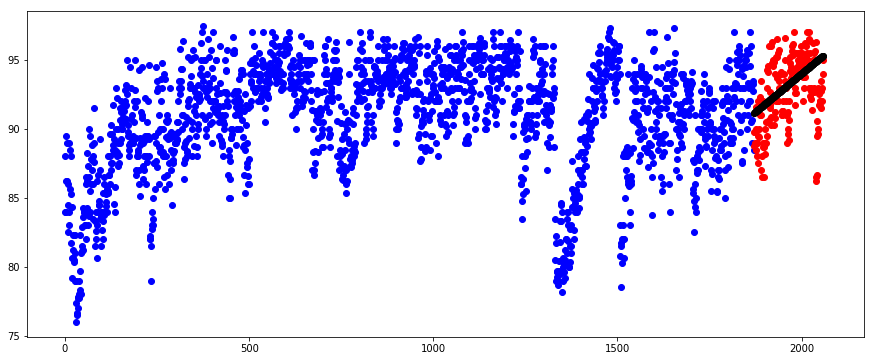

In [47]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

## Example 1  : Polynomial Fitting Analysis

In [3]:
dataset = pd.read_csv('m_1935.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

p1 = MemLeakDetectionAlgorithmPolyFit(min_window = 48)
p1 = p1.fit(dataset.mem_util_percent)
dataset = p1.predict(dataset.mem_util_percent)
dataset['label'].value_counts()

0    1510
1     549
Name: label, dtype: int64

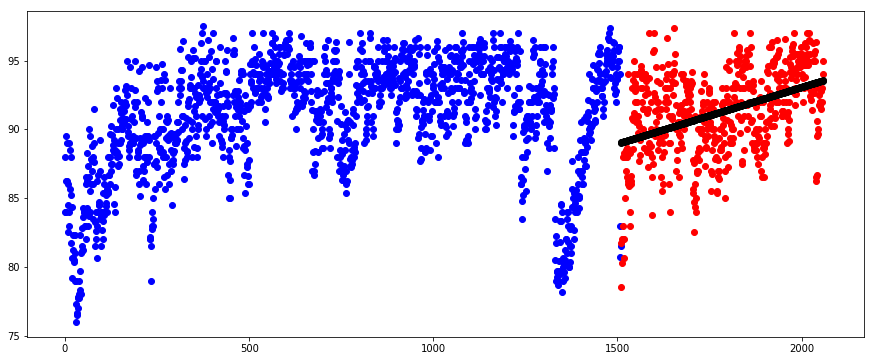

In [45]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

## Example 1  : Using Change point detection

In [3]:
dataset = pd.read_csv('m_1935.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

In [4]:
dataset.head()

,machine_id,mem_util_percent,label
timestamp,,,
2018-01-01 00:00:00,m_1935,84.00,Normal
2018-01-01 00:05:00,m_1935,88.00,Normal
2018-01-01 00:10:00,m_1935,84.00,Normal
2018-01-01 00:15:00,m_1935,86.25,Normal
2018-01-01 00:20:00,m_1935,89.50,Normal


In [5]:
p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset.mem_util_percent)
dataset_temp = p1.predict(dataset.mem_util_percent)
dataset['label'] = dataset_temp['label'].values
dataset['trend'] = dataset_temp['trend'].values
dataset['label'].value_counts()

False
[  0  23  48  69 111 119 134 135 137 151 182]


0    1316
1     743
Name: label, dtype: int64

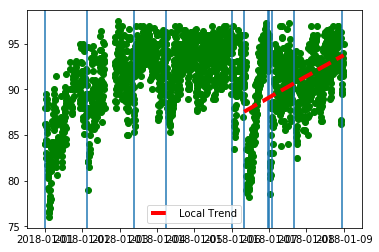

In [6]:
for xc in p1.change_point_indexes:
    plt.axvline(x=xc)
plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )
plt.scatter(dataset.index, dataset.mem_util_percent.values, color='green' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()

## Example 2

In [44]:
dataset = pd.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3, skiprows= 1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='30min')
dataset.index =  times
dataset.columns = ['Value']
dataset["Value"] = dataset["Value"]/8


INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [45]:
p1 = MemLeakDetectionAlgorithm()
p1 = p1.fit(dataset)
dataset_n = p1.predict(dataset)
dataset_n['label'].value_counts()
dataset_n.index = dataset.index[43:]

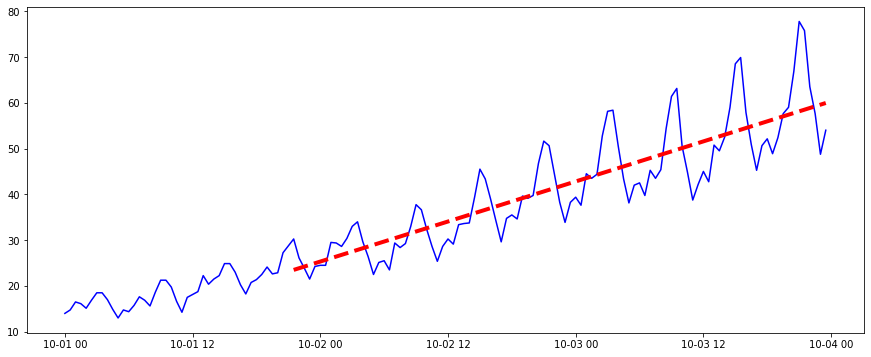

In [46]:
#dataset.query('label == 0').iloc[:,0].plot(color='b')
plt.plot(dataset.index, dataset.Value.values, color='blue' )
plt.plot(dataset_n.query('label == 1').index, dataset_n.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )


In [9]:
dataset = pd.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3, skiprows= 1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.columns = ['Value']
dataset["Value"] = dataset["Value"]/8

p1 = MemLeakDetectionAlgorithmPolyFit()
p1 = p1.fit(dataset)
dataset = p1.predict(dataset)
dataset['label'].value_counts()

1    144
Name: label, dtype: int64

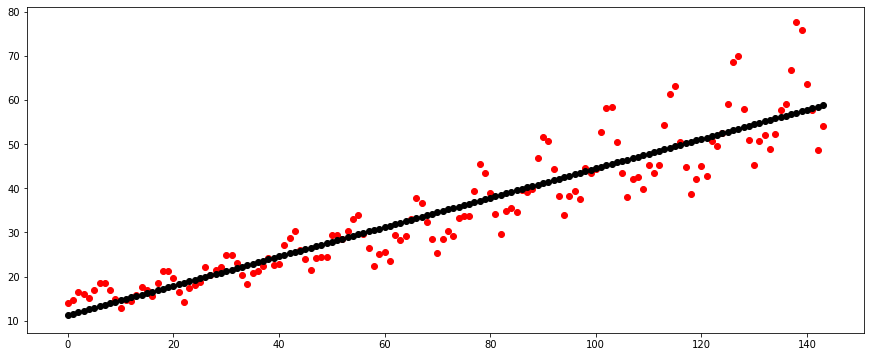

In [10]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [11]:
dataset = pd.read_csv('data.csv', usecols=[1], engine='python', skipfooter=3, skiprows= 1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.columns = ['Value']
dataset["Value"] = dataset["Value"]/8
p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset)
dataset_temp = p1.predict(dataset)
dataset['label'] = dataset_temp['label'].values
dataset['trend'] = dataset_temp['trend'].values
dataset['label'].value_counts()

1    144
Name: label, dtype: int64

In [12]:
p1.change_point_indexes

DatetimeIndex(['2012-10-01 00:00:00', '2012-10-06 23:00:00'], dtype='datetime64[ns]', freq=None)

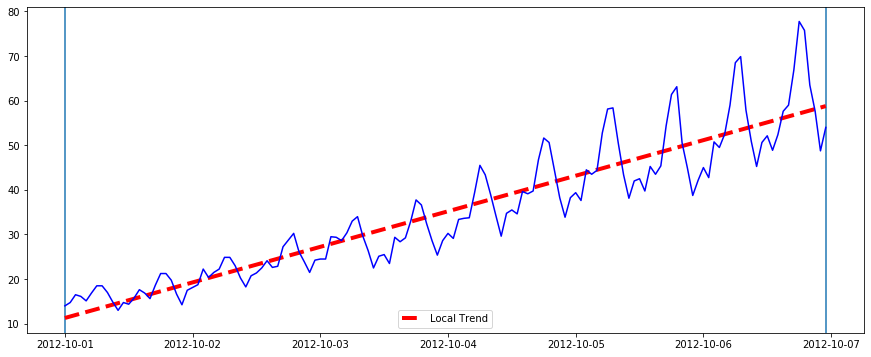

In [13]:
for xc in p1.change_point_indexes:
    plt.axvline(x=xc)
plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )
plt.plot(dataset.index, dataset.Value.values, color='blue' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()

## Example 3 

In [274]:
dataset = pd.read_csv('test6.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['mem_util_percent']

In [6]:
dataset = pd.read_csv('m_1939.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

p1 = MemLeakDetectionAlgorithm(min_window = 12)
p1 = p1.fit(dataset.mem_util_percent)
dataset = p1.predict(dataset.mem_util_percent)
dataset['label'].value_counts()

0    1927
Name: label, dtype: int64

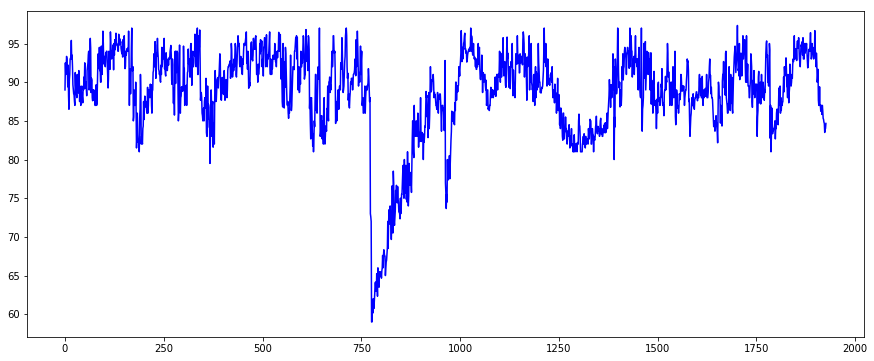

In [9]:
dataset.query('label == 0')[dataset.columns[0]].plot(color='b')

In [8]:
dataset = pd.read_csv('m_1939.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

p1 = MemLeakDetectionAlgorithmPolyFit(min_window = 12)
p1 = p1.fit(dataset.mem_util_percent)
dataset = p1.predict(dataset.mem_util_percent)
dataset['label'].value_counts()

1    1116
0     811
Name: label, dtype: int64

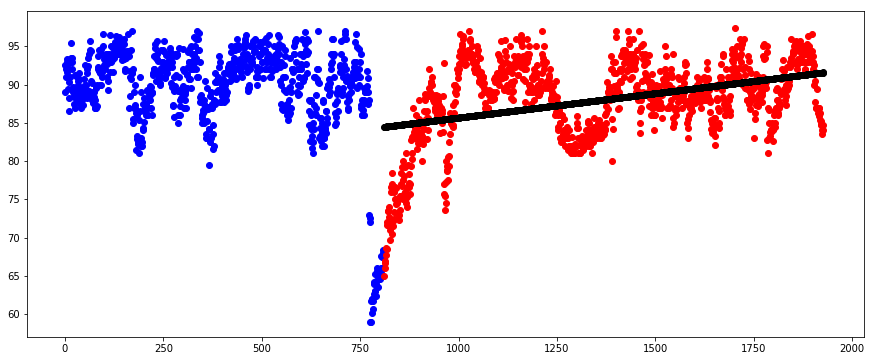

In [35]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [7]:
dataset = pd.read_csv('m_1939.csv', names=['timestamp', 'machine_id', 'mem_util_percent', 'label'], skiprows = 1)
dataset['timestamp'] =  pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset.mem_util_percent)
dataset_temp = p1.predict(dataset.mem_util_percent)
dataset['label'] = dataset_temp['label'].values
dataset['trend'] = dataset_temp['trend'].values
dataset['label'].value_counts()

True
[  0  54  55  56  57  58  61  78  79  80  81  82  83  84  85  86 177]


1    1157
0     770
Name: label, dtype: int64

In [8]:
dataset.head()

,machine_id,mem_util_percent,label,trend
timestamp,,,,
2018-01-01 00:00:00,m_1939,89.000000,0,0.0
2018-01-01 00:05:00,m_1939,92.500000,0,0.0
2018-01-01 00:10:00,m_1939,91.000000,0,0.0
2018-01-01 00:15:00,m_1939,92.000000,0,0.0
2018-01-01 00:20:00,m_1939,93.333333,0,0.0


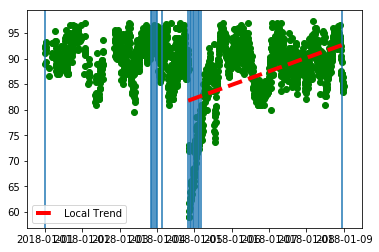

In [9]:
for xc in p1.change_point_indexes:
    plt.axvline(x=xc)
plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )
plt.scatter(dataset.index, dataset.mem_util_percent.values, color='green' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()

## Example 4 

In [47]:
dataset = pd.read_csv('test7.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='30min')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['Value']


In [48]:
dataset

,Value
2012-10-01 00:00:00,10.655587
2012-10-01 00:30:00,12.989771
2012-10-01 01:00:00,12.253636
2012-10-01 01:30:00,12.790849
2012-10-01 02:00:00,11.377518
...,...
2012-10-07 03:30:00,68.867897
2012-10-07 04:00:00,63.582232
2012-10-07 04:30:00,63.590288
2012-10-07 05:00:00,64.849524


In [49]:
p1 = MemLeakDetectionAlgorithm(min_window = 12)
p1 = p1.fit(dataset)
dataset = p1.predict(dataset)
dataset['label'].value_counts()

1    88
Name: label, dtype: int64

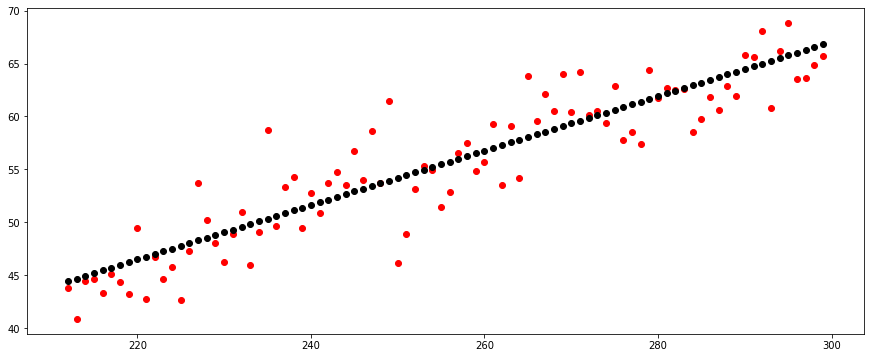

In [50]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [10]:
dataset = pd.read_csv('test7.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)

p1 = MemLeakDetectionAlgorithmPolyFit(min_window = 12)
p1 = p1.fit(dataset)
dataset = p1.predict(dataset)
dataset['label'].value_counts()

1    300
Name: label, dtype: int64

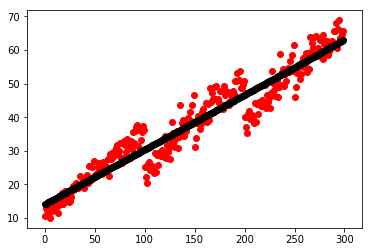

In [10]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [73]:
dataset = pd.read_csv('test7.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='10min')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['Value']
p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset)
dataset_temp = p1.predict(dataset)
dataset['label'] = dataset_temp['label'].values
dataset['trend'] = dataset_temp['trend'].values
dataset['label'].value_counts()
for xc in p1.change_point_indexes:
    plt.axvline(x=xc)
plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )
plt.plot(dataset.index, dataset.Value.values, color='green' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()

1    300
Name: label, dtype: int64

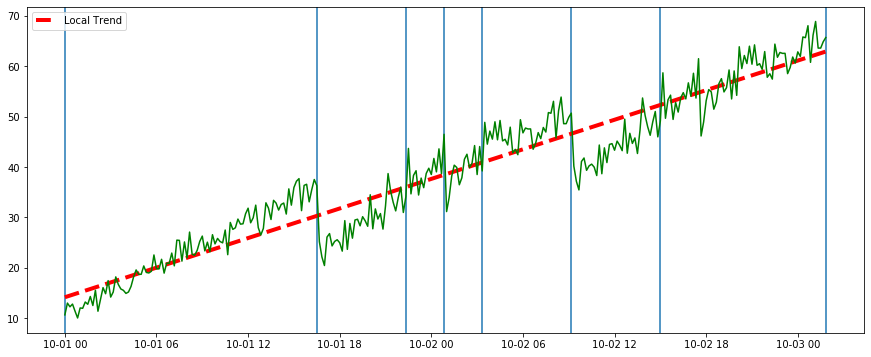

## Example 5 

In [27]:
dataset = pd.read_csv('test6.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)

p1 = MemLeakDetectionAlgorithm(min_window = 12)
p1 = p1.fit(dataset)
dataset = p1.predict(dataset)
dataset['label'].value_counts()

0    1458
1      42
Name: label, dtype: int64

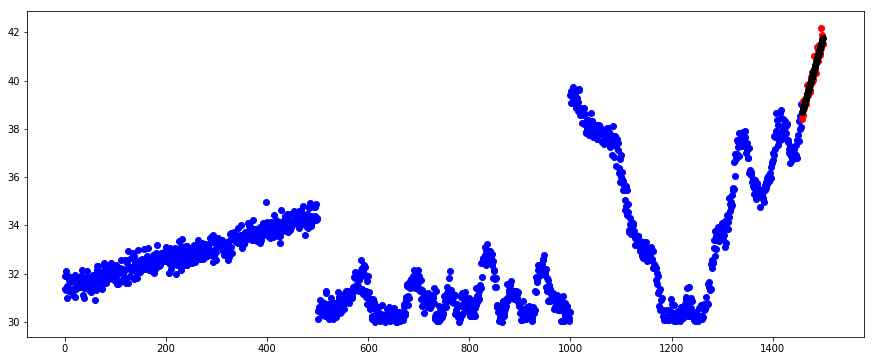

In [28]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [29]:
dataset = pd.read_csv('test6.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)

p1 = MemLeakDetectionAlgorithmPolyFit(min_window = 12)
p1 = p1.fit(dataset)
dataset = p1.predict(dataset)
dataset['label'].value_counts()

0    1435
1      65
Name: label, dtype: int64

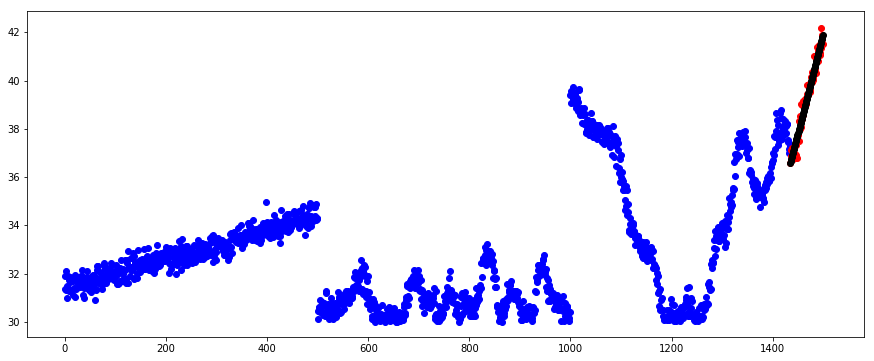

In [30]:
plt.scatter(dataset.query('label == 0').index, dataset.query('label == 0')[dataset.columns[0]].values,marker='o', color='b' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1')[dataset.columns[0]].values,marker='o', color='red' )
plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,marker='o', color='black' )

In [18]:
dataset = pd.read_csv('test6.csv', engine='python',skiprows=1, header=None)
times = pd.date_range('2012-10-01', periods=len(dataset.values), freq='1H')
dataset.index =  times
dataset.drop([0], axis=1, inplace=True)
dataset.columns = ['mem_util_percent']

p1 = MemLeakDetectionAlgorithmChangePoints()
p1 = p1.fit(dataset.mem_util_percent)
dataset_temp = p1.predict(dataset.mem_util_percent)
dataset['label'] = dataset_temp['label'].values
dataset['trend'] = dataset_temp['trend'].values
dataset['label'].value_counts()

False


0    1233
1     267
Name: label, dtype: int64

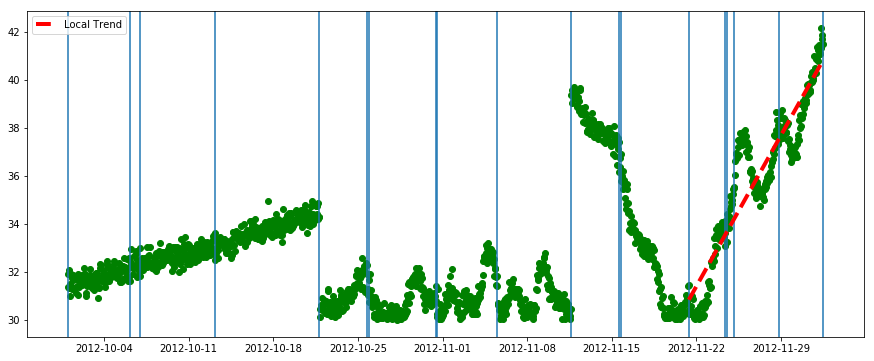

In [19]:
for xc in p1.change_point_indexes:
    plt.axvline(x=xc)
plt.plot(dataset.query('label == 1').index, dataset.query('label == 1').trend.values,'--', linewidth=4, color='red', label='Local Trend' )
plt.scatter(dataset.index, dataset.mem_util_percent.values, color='green' )
#plt.scatter(dataset.query('label == 1').index, dataset.query('label == 1').mem_util_percent.values,marker='o', color='red' )
plt.legend()